In [2]:
#Specialization: Data Science
#ID: LISUM04
#Name: Zain Ul Haq
#Zainulhaq904@gmail.com
#Marzie Hossein
#shosseini@uni-potsdam.de
#Bao Nguyenkhan 
#nguyenkhanhbao8695@gmail.com
#Country:Germany


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

# Read the Dataset


In [64]:
df = pd.read_csv("D:\Drug-Persistency-ML-Model-main\Healthcare_dataset.csv")


In [65]:
df.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1


In [66]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Ptid                                                                3424 non-null   object
 1   Persistency_Flag                                                    3424 non-null   object
 2   Gender                                                              3424 non-null   object
 3   Race                                                                3424 non-null   object
 4   Ethnicity                                                           3424 non-null   object
 5   Region                                                              3424 non-null   object
 6   Age_Bucket                                                          3424 non-null   object
 7   Ntm_Speciality          

# Statistical Analysis


In [67]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Dexa_Freq_During_Rx,3424.0,3.016063,8.136545,0.0,0.0,0.0,3.0,146.0
Count_Of_Risks,3424.0,1.239486,1.094914,0.0,0.0,1.0,2.0,7.0


# Checking Null values in Dataset

In [68]:
print(df.isnull().sum().sum())

0


In [42]:
df.drop(df.index[df['Ntm_Speciality'] == 'Unknown'], inplace = True)
df.drop(df.index[df['Ethnicity'] == 'Unknown'], inplace = True)
df.drop(df.index[df['Risk_Segment_During_Rx'] == 'Unknown'], inplace = True)
df.drop(df.index[df['Tscore_Bucket_During_Rx'] == 'Unknown'], inplace = True)
df.drop(df.index[df['Change_T_Score'] == 'Unknown'], inplace = True)
df.drop(df.index[df['Change_Risk_Segment'] == 'Unknown'], inplace = True)
df.drop(df.index[df['Adherent_Flag'] == 'Unknown'], inplace = True)

It is being evident that most of the values in Dataset are 'unknown' so it's better to drop the values in dataframe which result in dimentionality reduction. This approach helps us in optimizing our ML model results

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Count_Of_Risks'>

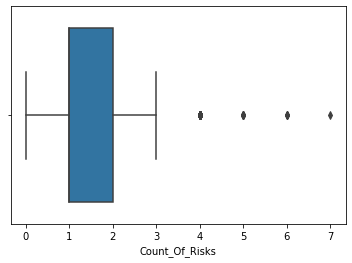

In [43]:
sns.boxplot(df['Count_Of_Risks'])


In [44]:
df['Persistency_Flag'].value_counts()

Non-Persistent    606
Persistent        475
Name: Persistency_Flag, dtype: int64

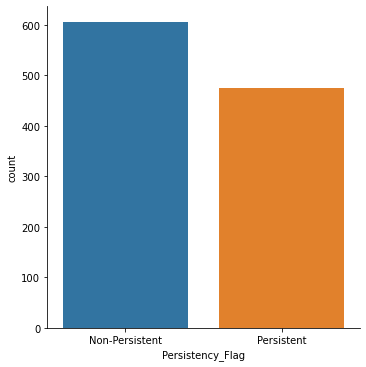

In [45]:
sns.catplot(data=df,x="Persistency_Flag",kind='count')

<AxesSubplot:>

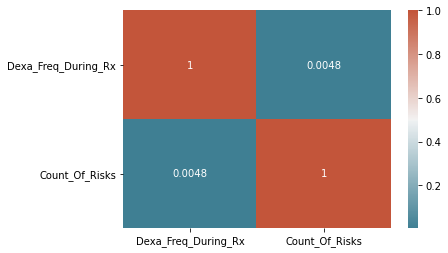

In [34]:
corr=df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

It shows  eho hadn't Dexa_freq_during_Rx scans are not be persistant and its the patients Dexa scans are more persistent with the drug

# Checking the Outliers

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dexa_Freq_During_Rx'>

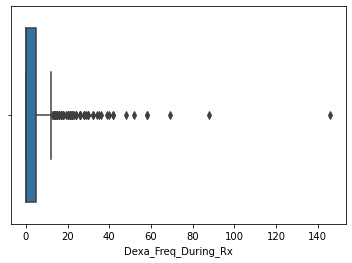

In [52]:
sns.boxplot(df.Dexa_Freq_During_Rx)

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Count_Of_Risks'>

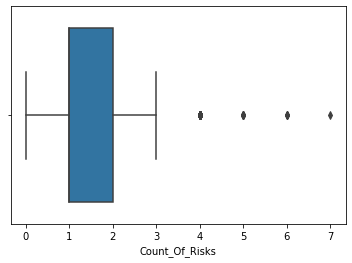

In [53]:
sns.boxplot(df.Count_Of_Risks)

As it is binary classifcation, change the categorial target variable 'Persistency_flag' into 1 and 0. 

In [56]:
from sklearn.preprocessing import LabelEncoder
#Converting categorical variables that contains two categories using Label Encoding
two_categ = ['Persistency_Flag','Gender','Ntm_Specialist_Flag','Risk_Segment_Prior_Ntm','Adherent_Flag', 'Tscore_Bucket_Prior_Ntm','Gluco_Record_Prior_Ntm','Gluco_Record_During_Rx','Dexa_During_Rx','Frag_Frac_During_Rx','Adherent_Flag','Idn_Indicator','Injectable_Experience_During_Rx','Frag_Frac_Prior_Ntm']

labenco = LabelEncoder()
for val in two_categ:
    df[val] = labenco.fit_transform(df[val])

In [57]:
#Coverting categorical variables with multiple categories using Label Encoding
multiple_categ = ['Age_Bucket','Ntm_Speciality','Ntm_Speciality_Bucket','Race','Ethnicity','Region']
for column in multiple_categ:
    df[column] = df[column].astype('category')
    df[column] = labenco.fit_transform(df[column])

In [58]:
df.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
2,P3,0,0,3,0,0,1,2,0,1,...,N,Y,N,N,N,N,N,N,N,2
3,P4,0,0,2,1,0,3,2,0,1,...,N,N,N,N,N,N,N,N,N,1
7,P8,0,0,2,1,0,3,2,0,1,...,N,N,N,N,N,N,N,N,N,1
11,P12,0,0,2,1,0,3,2,0,1,...,N,N,N,N,N,N,N,N,N,0
12,P13,0,0,2,1,0,3,2,0,1,...,N,N,Y,N,N,N,N,N,N,1


In [59]:
df.dtypes

Ptid                              object
Persistency_Flag                   int32
Gender                             int32
Race                               int32
Ethnicity                          int32
                                   ...  
Risk_Hysterectomy_Oophorectomy    object
Risk_Estrogen_Deficiency          object
Risk_Immobilization               object
Risk_Recurring_Falls              object
Count_Of_Risks                     int64
Length: 69, dtype: object

In [60]:
df.to_csv("Data_cleaned_dataset.csv", index = False)

<ipython-input-61-4da151d1771a>:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize = (15,10))


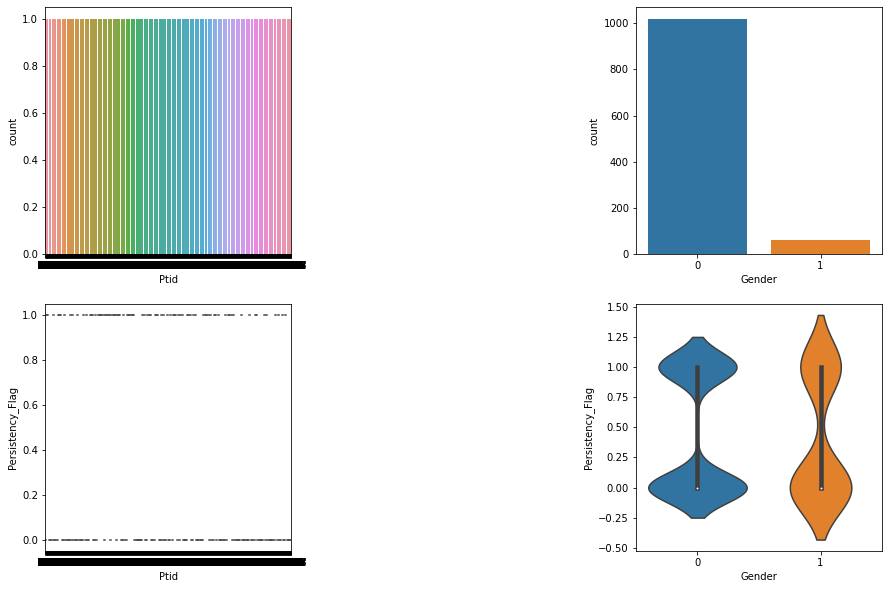

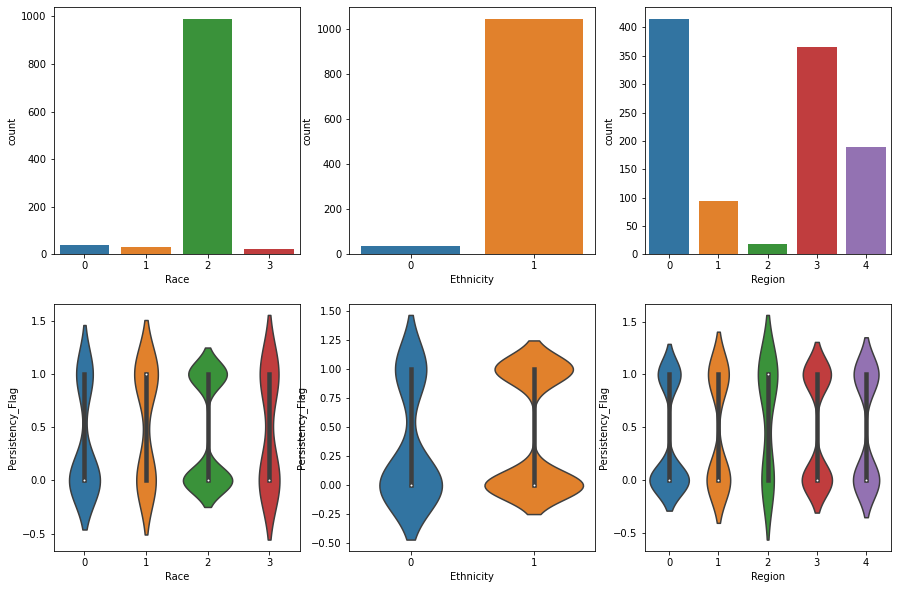

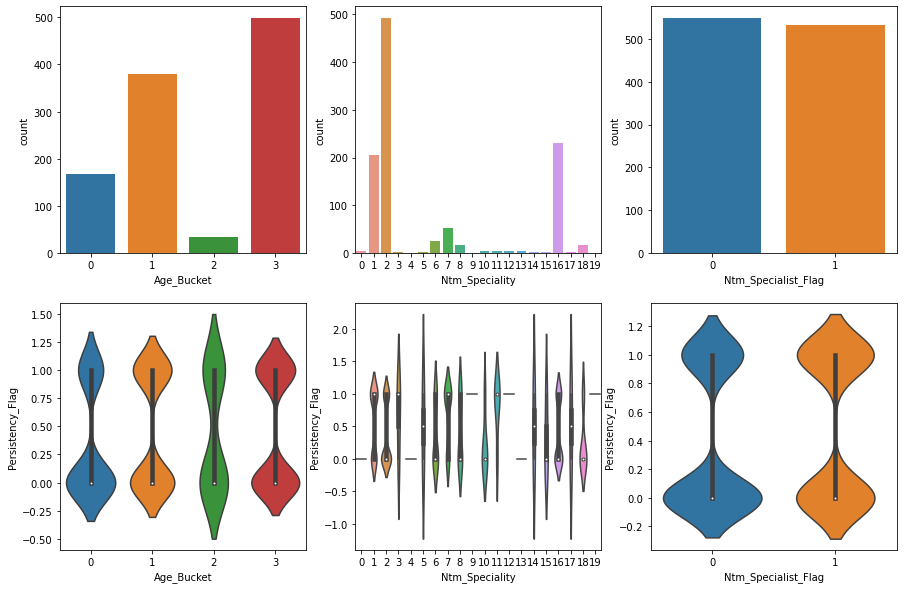

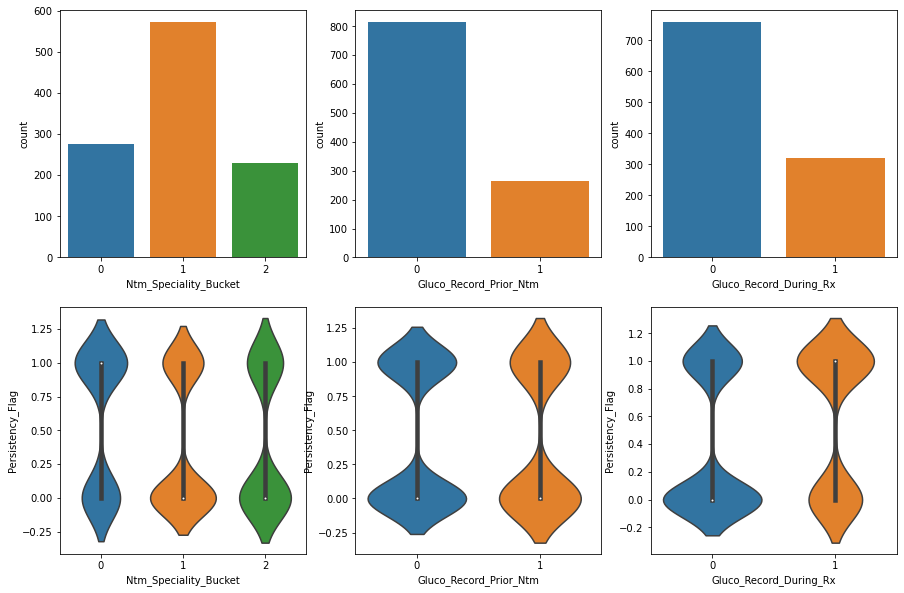

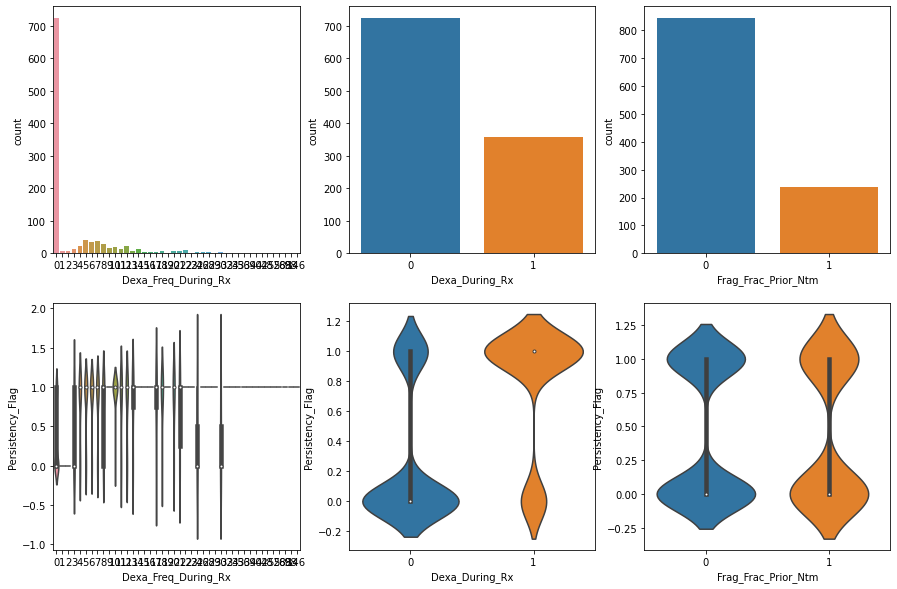

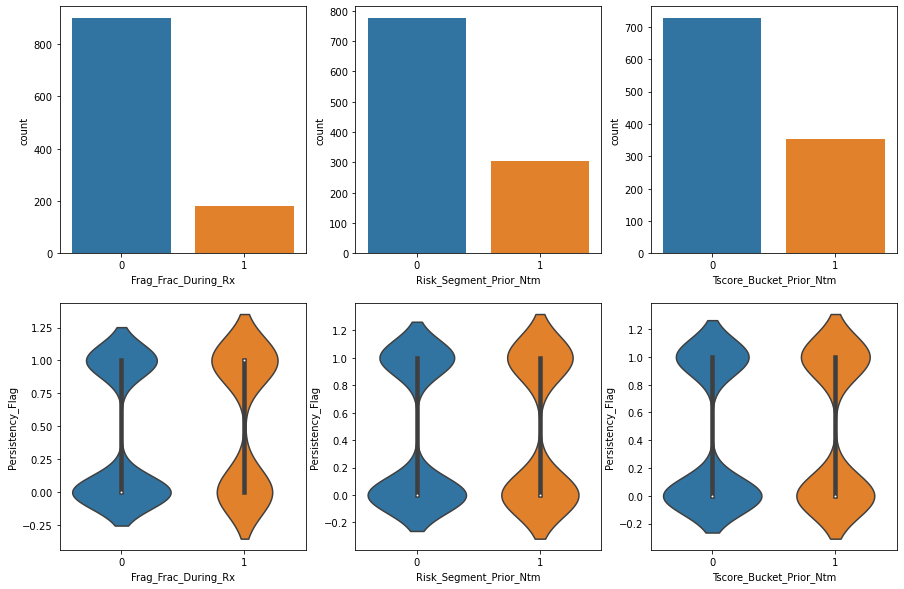

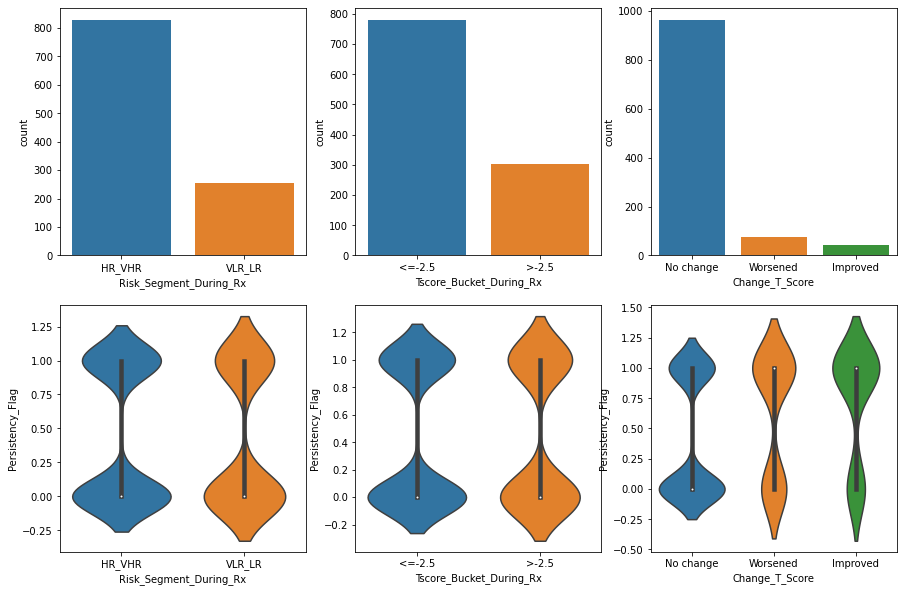

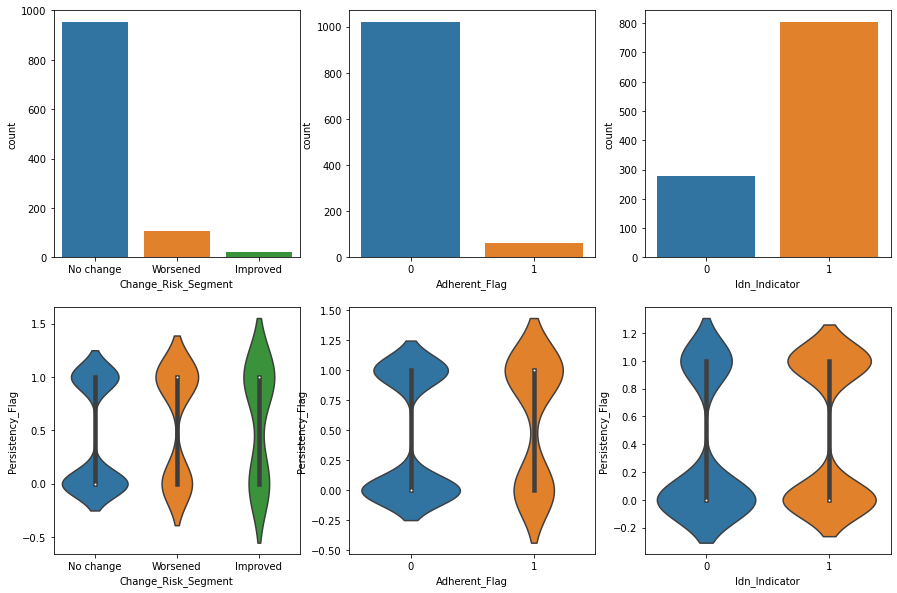

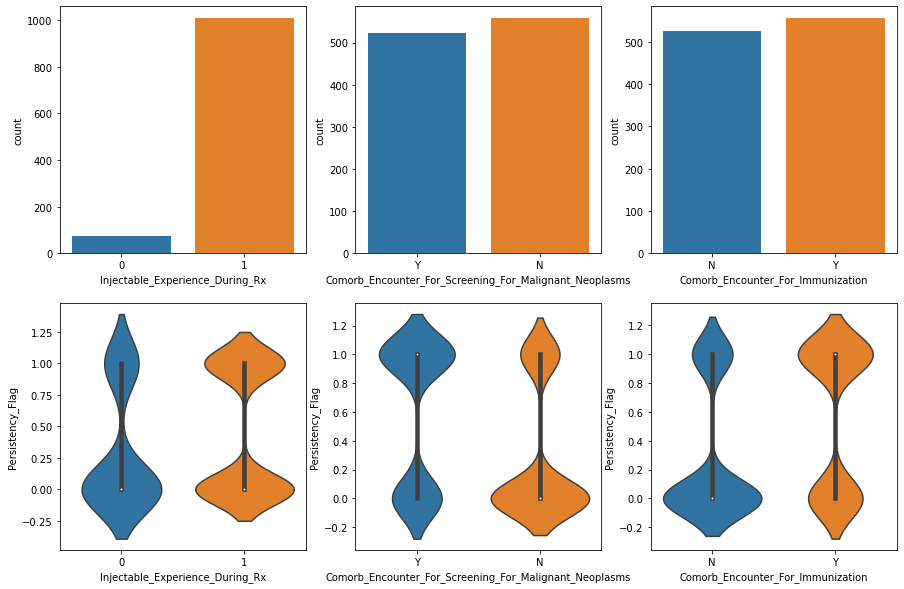

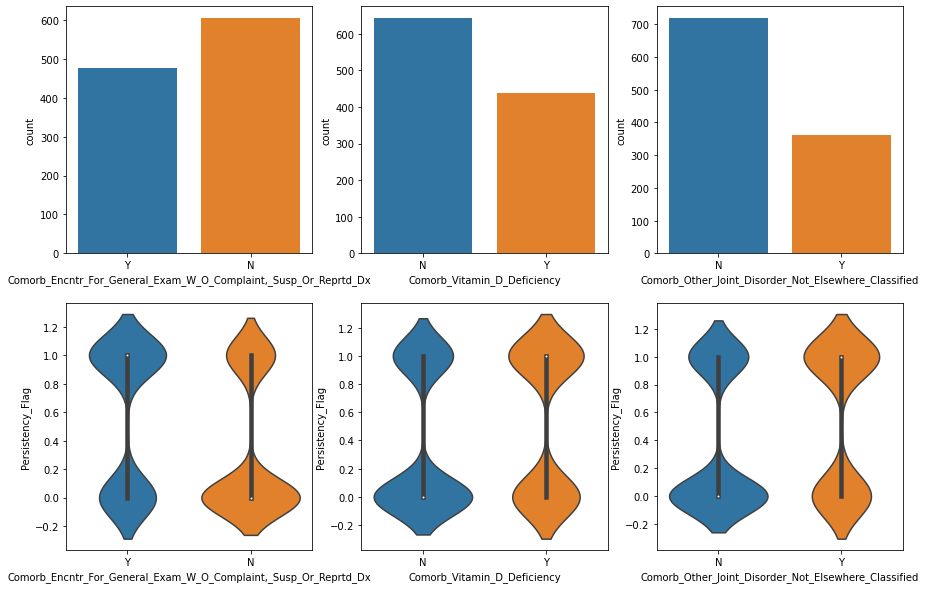

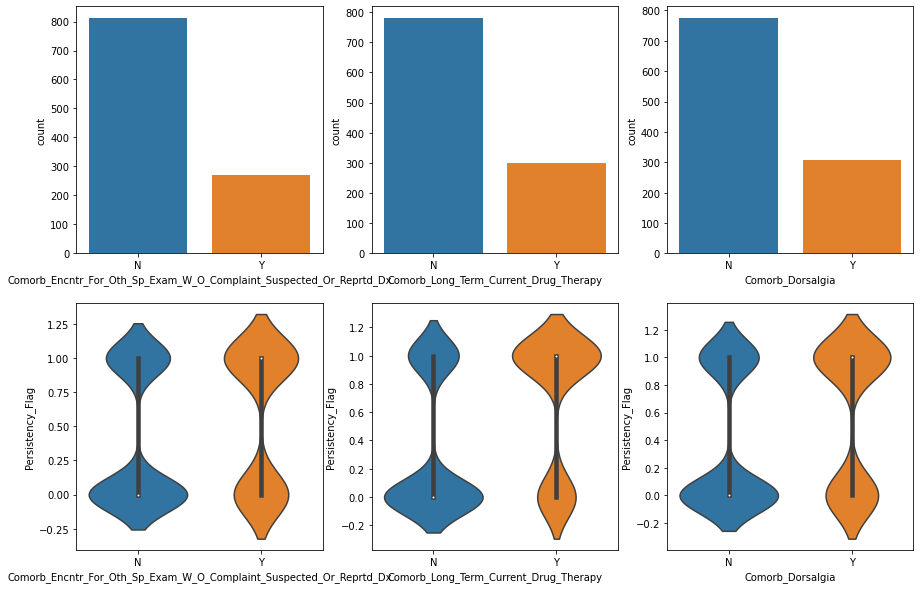

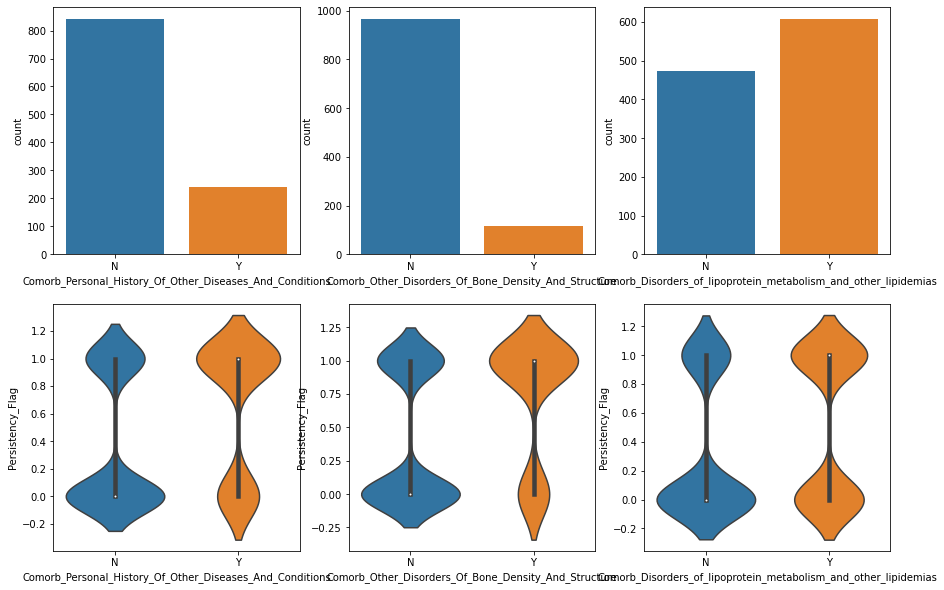

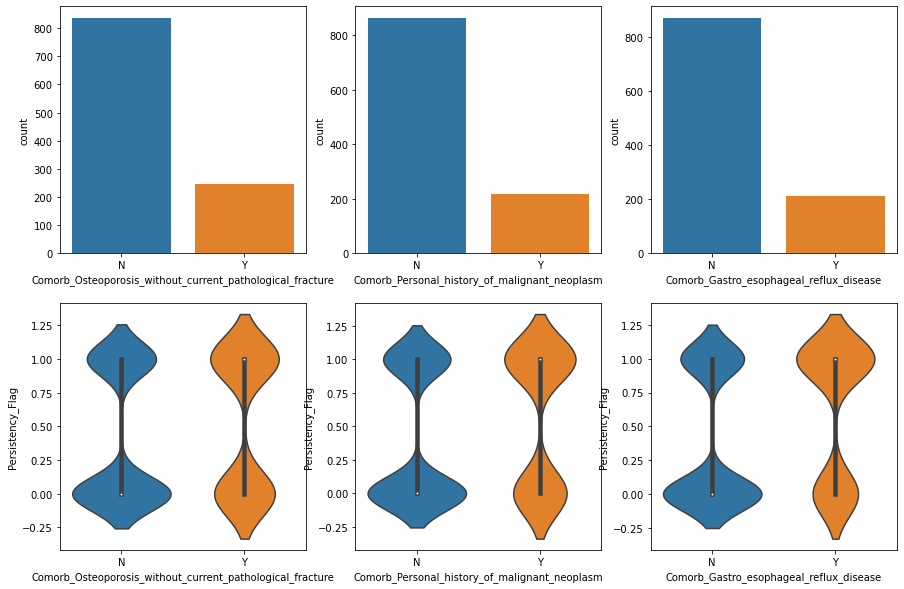

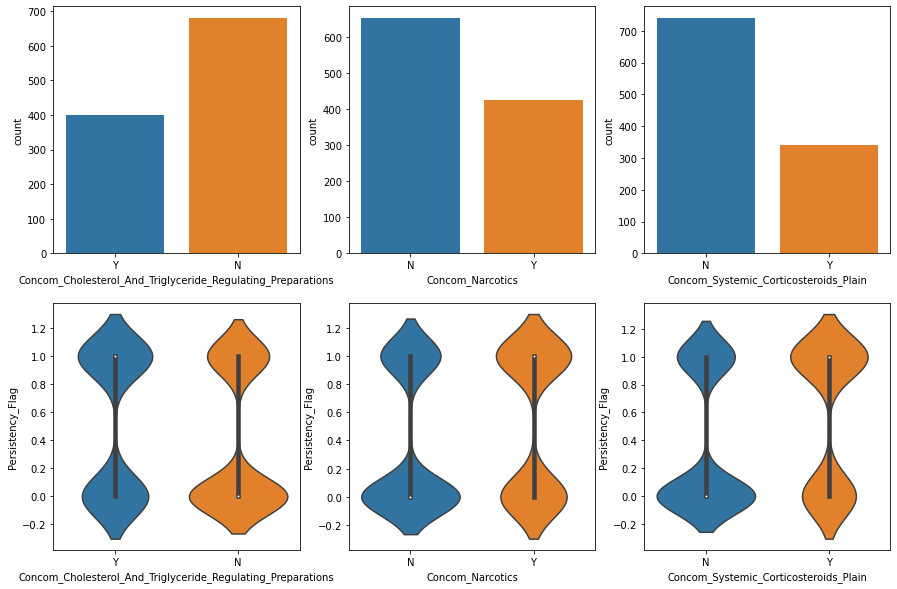

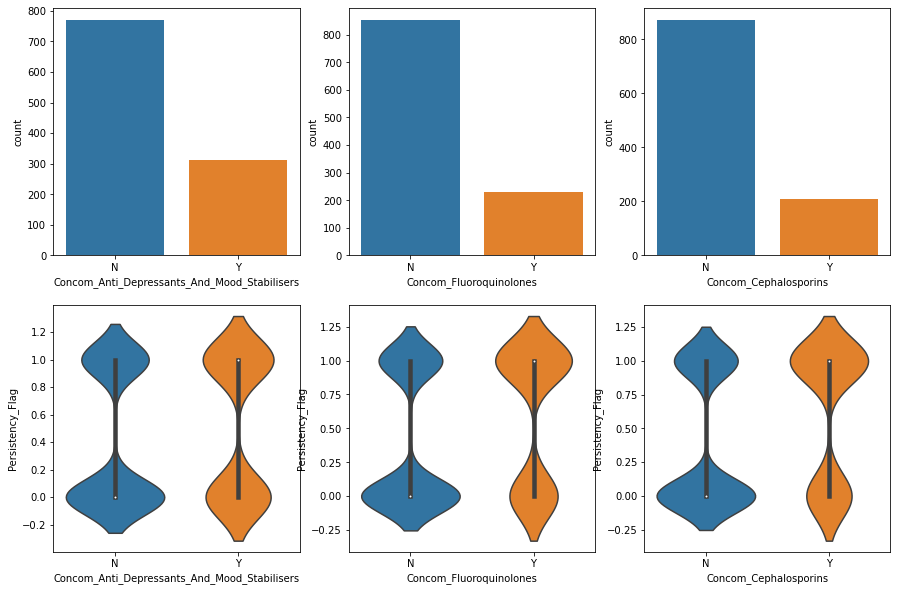

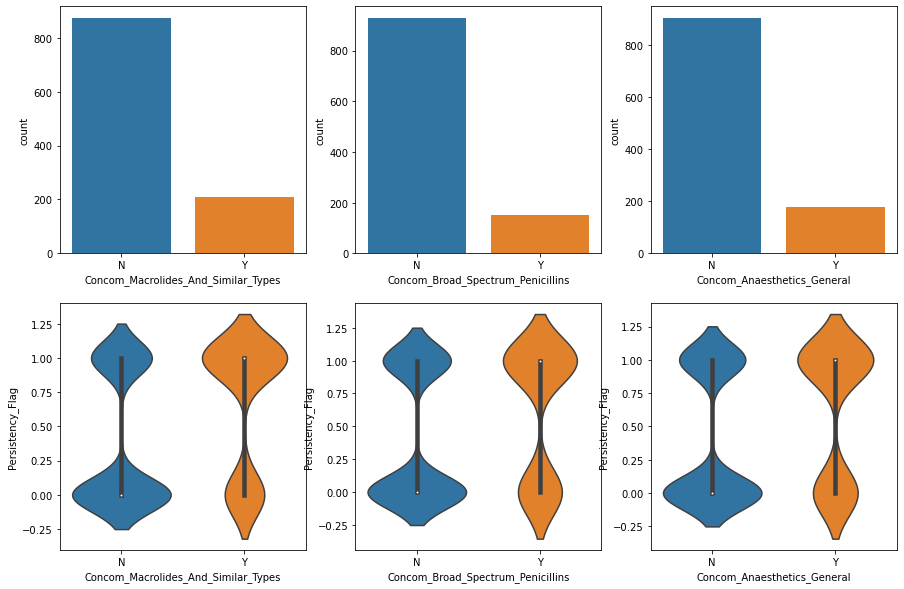

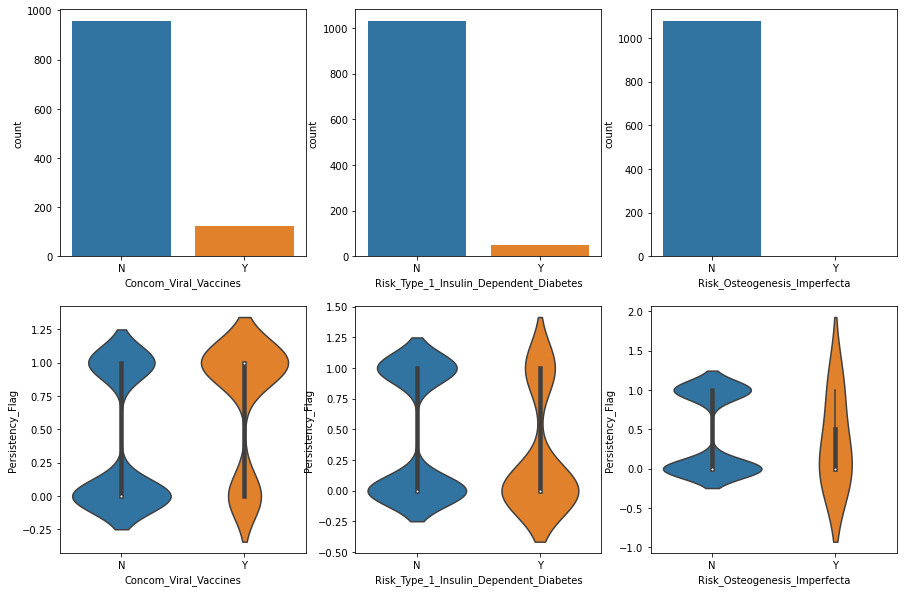

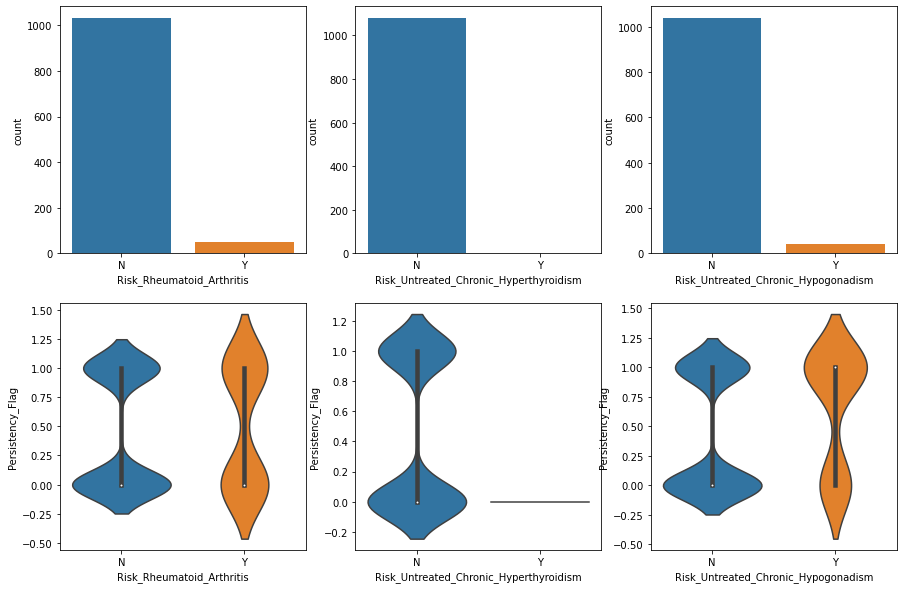

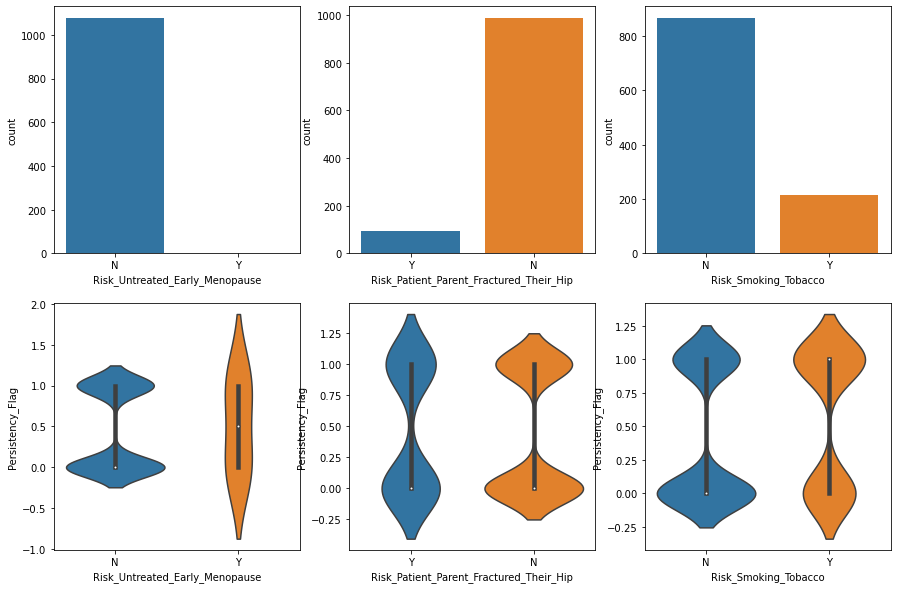

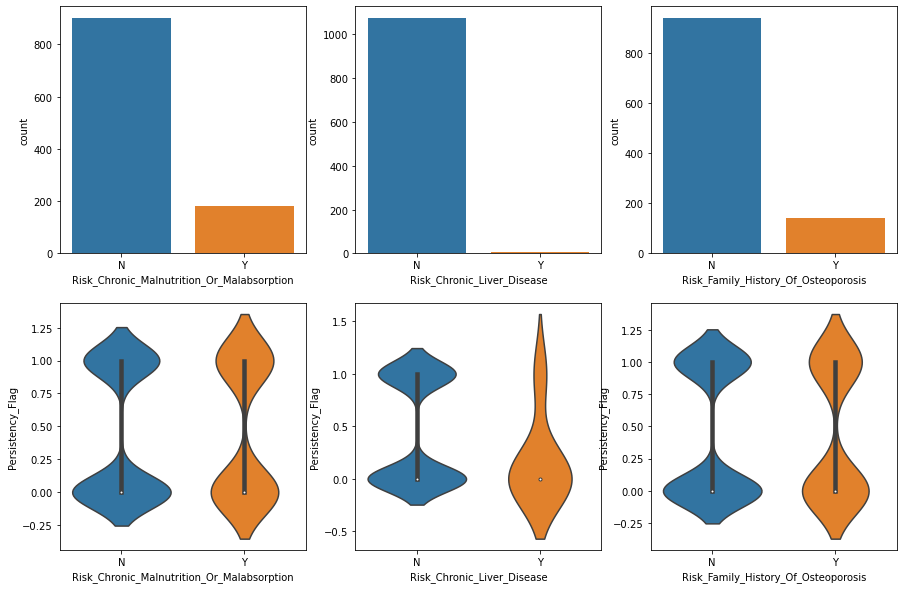

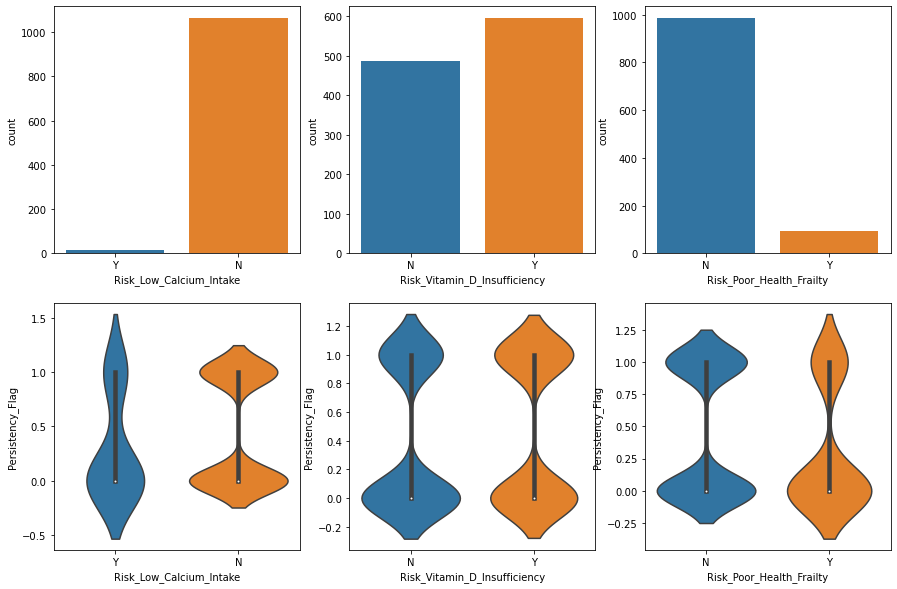

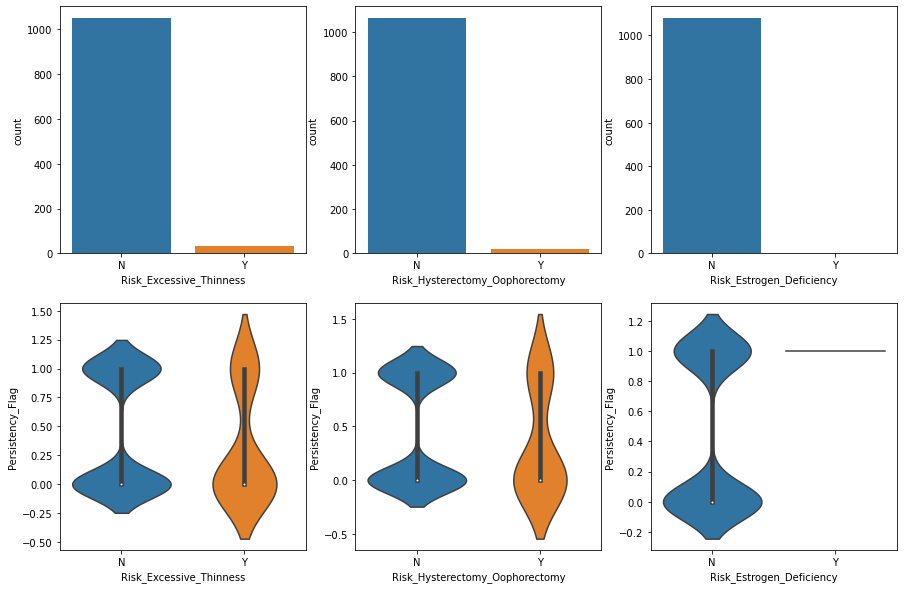

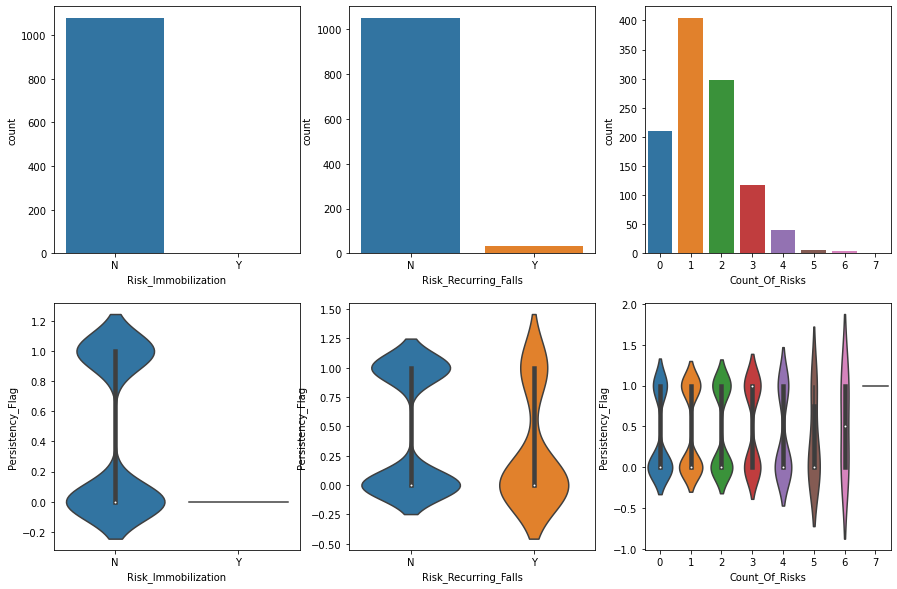

<Figure size 1080x720 with 0 Axes>

In [61]:
ix = 1
fig = plt.figure(figsize = (15,10))
for c in list(df.columns):
    if ix <= 3:
        if c != 'Persistency_Flag':
            ax1 = fig.add_subplot(2,3,ix)
            sns.countplot(data = df, x=c, ax = ax1)
            ax2 = fig.add_subplot(2,3,ix+3)
            sns.violinplot (data=df, x=c, y='Persistency_Flag',ax=ax2)
            
            
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (15,10))
        ix =1